In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import zipfile
from zipfile import ZipFile
import os, shutil
import numpy as np
import pandas as pd
import math
from math import ceil, floor
from IPython.display import display
from PIL import Image

In [0]:
def unzip_files(zipFilePath, unzip_directory):
    zipFile = ZipFile(zipFilePath, 'r')
    zipFile.extractall(unzip_directory)
    zipFile.close()

In [0]:
def delete_file_directory(path, isDirectory):
    if isDirectory:
        shutil.rmtree(path)
    else:
        os.remove(path)

In [0]:
unzip_files('drive/My Drive/datasets/land_use/EuroSAT.zip', 'Unzipped_EuroSAT_Data')

In [10]:
os.listdir('Unzipped_EuroSAT_Data')

['2750']

In [11]:
os.listdir('Unzipped_EuroSAT_Data/2750/')

['Pasture',
 'PermanentCrop',
 'Forest',
 'Industrial',
 'Highway',
 'SeaLake',
 'HerbaceousVegetation',
 'Residential',
 'River',
 'AnnualCrop']

In [0]:
land_use_type = os.listdir('Unzipped_EuroSAT_Data/2750/')

In [13]:
len(os.listdir('Unzipped_EuroSAT_Data/2750/AnnualCrop/'))

3000

In [14]:
os.listdir('Unzipped_EuroSAT_Data/2750/AnnualCrop/')[:5]

['AnnualCrop_647.jpg',
 'AnnualCrop_1767.jpg',
 'AnnualCrop_1269.jpg',
 'AnnualCrop_1406.jpg',
 'AnnualCrop_1747.jpg']

we are going to split the dataset in the following ration: 80% train, 10% validation and 10% test

In [0]:
def create_sub_dirs(parent_dir, sub_dirs_list):
    for cur_dir_name in sub_dirs_list:
        new_dir = os.path.join(parent_dir, cur_dir_name)
        os.mkdir(new_dir)

In [0]:
data_split_type = ['train_data', 'val_data', 'test_data']

In [0]:
create_sub_dirs('Unzipped_EuroSAT_Data', data_split_type)

In [0]:
for cur_data_type in data_split_type:
    create_sub_dirs('Unzipped_EuroSAT_Data/' + cur_data_type, land_use_type)

In [19]:
total_train_imgs = 0
total_val_imgs = 0
total_test_imgs = 0
base_dir = 'Unzipped_EuroSAT_Data/2750/'
for cur_land_use_type in land_use_type:
    print('current land use type', cur_land_use_type)
    print('number of images', len(os.listdir(base_dir + cur_land_use_type)))
    copy_dir = base_dir + cur_land_use_type
    paste_dir_train = 'Unzipped_EuroSAT_Data/train_data/' + cur_land_use_type
    paste_dir_val = 'Unzipped_EuroSAT_Data/val_data/' + cur_land_use_type
    paste_dir_test = 'Unzipped_EuroSAT_Data/test_data/' + cur_land_use_type
    cur_imgs = os.listdir(copy_dir)
    cur_num_of_imgs = len(cur_imgs)
    cur_num_of_train_imgs = ceil(0.8*cur_num_of_imgs)
    cur_num_of_val_imgs = ceil(0.1*cur_num_of_imgs)
    cur_num_of_test_imgs = cur_num_of_imgs - cur_num_of_train_imgs - cur_num_of_val_imgs
    total_train_imgs += cur_num_of_train_imgs
    total_val_imgs += cur_num_of_val_imgs
    total_test_imgs += cur_num_of_test_imgs
    print('num of train imgs', cur_num_of_train_imgs)
    print('num of val imgs', cur_num_of_val_imgs)
    print('num of test imgs', cur_num_of_test_imgs)
    for i in range(cur_num_of_imgs):
        src = os.path.join(copy_dir, cur_imgs[i])
        if i < cur_num_of_train_imgs:
            dst = os.path.join(paste_dir_train, cur_imgs[i])
        elif i < cur_num_of_train_imgs + cur_num_of_val_imgs:
            dst = os.path.join(paste_dir_val, cur_imgs[i])
        else:
            dst = os.path.join(paste_dir_test, cur_imgs[i])
        shutil.copyfile(src, dst)

current land use type Pasture
number of images 2000
num of train imgs 1600
num of val imgs 200
num of test imgs 200
current land use type PermanentCrop
number of images 2500
num of train imgs 2000
num of val imgs 250
num of test imgs 250
current land use type Forest
number of images 3000
num of train imgs 2400
num of val imgs 300
num of test imgs 300
current land use type Industrial
number of images 2500
num of train imgs 2000
num of val imgs 250
num of test imgs 250
current land use type Highway
number of images 2500
num of train imgs 2000
num of val imgs 250
num of test imgs 250
current land use type SeaLake
number of images 3000
num of train imgs 2400
num of val imgs 300
num of test imgs 300
current land use type HerbaceousVegetation
number of images 3000
num of train imgs 2400
num of val imgs 300
num of test imgs 300
current land use type Residential
number of images 3000
num of train imgs 2400
num of val imgs 300
num of test imgs 300
current land use type River
number of images 25

In [20]:
print('total train imgs', total_train_imgs)
print('total val imgs', total_val_imgs)
print('total test imgs', total_test_imgs)

total train imgs 21600
total val imgs 2700
total test imgs 2700


In [21]:
for cur_data_type in data_split_type:
    print('cur data type', cur_data_type)
    sub_dirs = os.listdir('Unzipped_EuroSAT_Data/' + cur_data_type)
    for cur_sub_dir in sub_dirs:
        print('cur sub dir', cur_sub_dir)
        print('num of imgs', len(os.listdir('Unzipped_EuroSAT_Data/' + cur_data_type + '/' + cur_sub_dir)))

cur data type train_data
cur sub dir Pasture
num of imgs 1600
cur sub dir PermanentCrop
num of imgs 2000
cur sub dir Forest
num of imgs 2400
cur sub dir Industrial
num of imgs 2000
cur sub dir Highway
num of imgs 2000
cur sub dir SeaLake
num of imgs 2400
cur sub dir HerbaceousVegetation
num of imgs 2400
cur sub dir Residential
num of imgs 2400
cur sub dir River
num of imgs 2000
cur sub dir AnnualCrop
num of imgs 2400
cur data type val_data
cur sub dir Pasture
num of imgs 200
cur sub dir PermanentCrop
num of imgs 250
cur sub dir Forest
num of imgs 300
cur sub dir Industrial
num of imgs 250
cur sub dir Highway
num of imgs 250
cur sub dir SeaLake
num of imgs 300
cur sub dir HerbaceousVegetation
num of imgs 300
cur sub dir Residential
num of imgs 300
cur sub dir River
num of imgs 250
cur sub dir AnnualCrop
num of imgs 300
cur data type test_data
cur sub dir Pasture
num of imgs 200
cur sub dir PermanentCrop
num of imgs 250
cur sub dir Forest
num of imgs 300
cur sub dir Industrial
num of img

In [0]:
delete_file_directory(base_dir, True)

Current land use type: Pasture


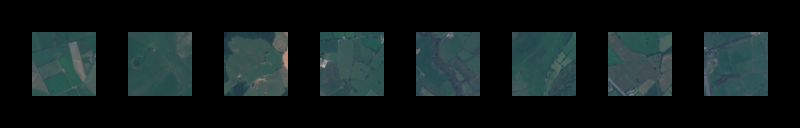

Current land use type: PermanentCrop


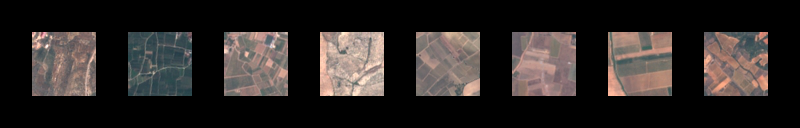

Current land use type: Forest


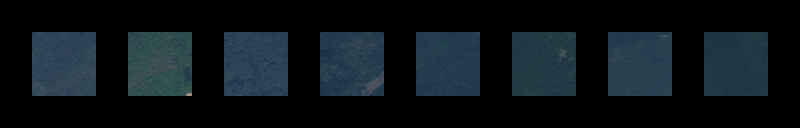

Current land use type: Industrial


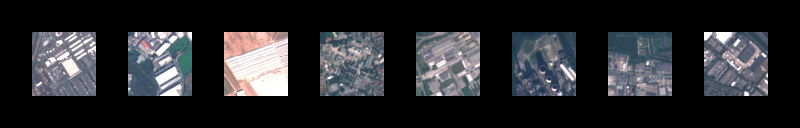

Current land use type: Highway


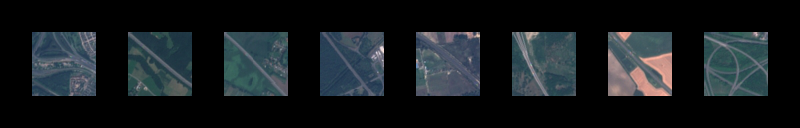

Current land use type: SeaLake


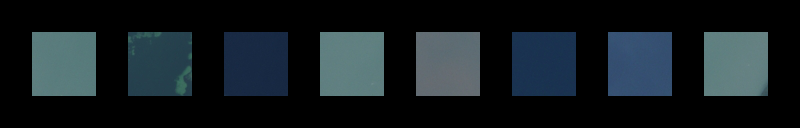

Current land use type: HerbaceousVegetation


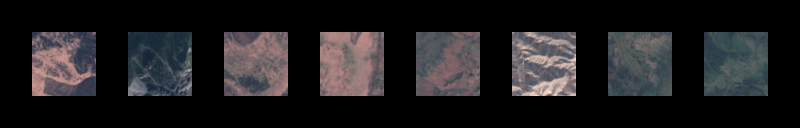

Current land use type: Residential


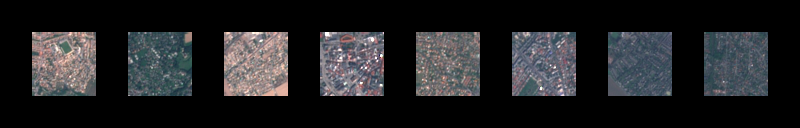

Current land use type: River


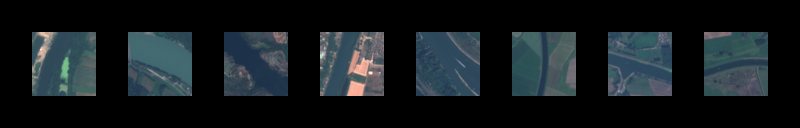

Current land use type: AnnualCrop


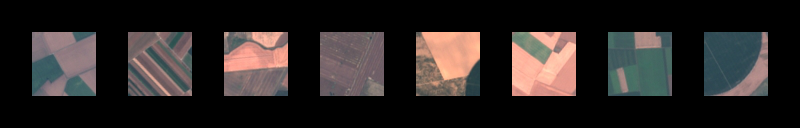

In [27]:
for cur_land_use_type in land_use_type:
    print('Current land use type:', cur_land_use_type)
    cur_land_type_dir = 'Unzipped_EuroSAT_Data/train_data/' + cur_land_use_type
    cur_land_type_imgs = os.listdir(cur_land_type_dir)[:8]
    canvas_sheet_width = 800
    canvas_sheet_height = 128
    canvas_sheet = Image.new('RGB', (canvas_sheet_width, canvas_sheet_height))
    x = 32
    for cur_img in cur_land_type_imgs:
        img = Image.open(cur_land_type_dir + '/' + cur_img)
        canvas_sheet.paste(img, (x, 32))
        x += 64 + 32
    display(canvas_sheet)

In [28]:
from keras import layers, models, optimizers

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def get_train_datagen(augmentData):
  if augmentData:
    return ImageDataGenerator(
            rescale=1.0/255,
            rotation_range=25,
            width_shift_range=0.25,
            height_shift_range=0.25,
            shear_range=0.25,
            zoom_range=0.25,
            horizontal_flip=True,
            fill_mode='nearest'
            )
  else:
    return ImageDataGenerator(rescale=1.0/255)
  
def get_val_datagen():
  return ImageDataGenerator(rescale=1.0/255)
  
def get_test_datagen():
  return ImageDataGenerator(rescale=1.0/255)

In [0]:
def handle_model_fit_gen(model, num_epochs, train_generator, validation_generator):
  
  history_data = model.fit_generator(
      train_generator, 
      steps_per_epoch=steps_per_epoch, 
      epochs=num_epochs, 
      validation_data=validation_generator, 
      validation_steps=validation_steps)
  return history_data

In [38]:
batch_size = 64
steps_per_epoch = floor(total_train_imgs/batch_size)
validation_steps = floor(total_val_imgs/batch_size)
test_steps = floor(total_test_imgs/batch_size)
print('steps_per_epoch', steps_per_epoch)
print('validation_steps', validation_steps)
print('test_steps', test_steps)

steps_per_epoch 337
validation_steps 42
test_steps 42


In [0]:
import seaborn as sns

def create_line_charts(df, title, xlabel, ylabel):
  ax = sns.lineplot(data=df)
  ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
  
def create_acc_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  acc_val = history_data.history['acc']
  validation_acc_val = history_data.history['val_acc']
  acc_dict = {
      'epochs':epochs_val,
      'train_acc':acc_val,
      'val_acc':validation_acc_val
  }
  acc_df = pd.DataFrame(acc_dict)
  acc_df.set_index('epochs', inplace=True)
  return acc_df

def create_loss_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  loss_val = history_data.history['loss']
  validation_loss_val = history_data.history['val_loss']
  loss_dict = {
      'epochs':epochs_val,
      'train_loss':loss_val,
      'val_loss':validation_loss_val
  }
  loss_df = pd.DataFrame(loss_dict)
  loss_df.set_index('epochs', inplace=True)
  return loss_df

We will be implementing transfer learning

In [0]:
from keras.applications import VGG19, InceptionV3

In [0]:
def get_VGG19_Conv_Base(input_shape):
  return VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

In [42]:
conv_base1 = get_VGG19_Conv_Base((64,64,3))

W0903 19:53:07.993305 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 19:53:08.041941 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 19:53:08.050696 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 19:53:08.091416 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



80142336/80134624 [==============================] - 7s 0us/step


W0903 19:53:16.971349 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0903 19:53:16.972703 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [43]:
conv_base1.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [46]:
custom_model1 = models.Sequential()
custom_model1.add(conv_base1)
custom_model1.add(layers.Flatten())
custom_model1.add(layers.Dropout(rate=0.3))
custom_model1.add(layers.Dense(512, activation='relu'))
custom_model1.add(layers.Dropout(rate=0.4))
custom_model1.add(layers.Dense(10, activation='softmax'))

W0903 19:56:33.072279 139978786039680 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [47]:
custom_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 21,078,602
Trainable params: 21,078,602
Non-trainable params: 0
__________________________________________

In [48]:
print('number of trainable weights before freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights before freezing the conv base 36


In [0]:
conv_base1.trainable = False

In [50]:
print('number of trainable weights after freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights after freezing the conv base 4


In [51]:
custom_model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['accuracy'])

W0903 19:58:31.231114 139978786039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
train_dir = 'Unzipped_EuroSAT_Data/train_data'
val_dir = 'Unzipped_EuroSAT_Data/val_data'
test_dir = 'Unzipped_EuroSAT_Data/test_data'

In [0]:
train_datagen1 = get_train_datagen(True)
validation_datagen1 = get_val_datagen()
test_datagen1 = get_test_datagen()

In [54]:
train_generator1 = train_datagen1.flow_from_directory(train_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')
validation_generator1 = validation_datagen1.flow_from_directory(val_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [55]:
model_history_data1 = handle_model_fit_gen(custom_model1, 75, train_generator1, validation_generator1)

W0903 20:07:28.900940 139978786039680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/75
337/337 [==============================] - 35s 105ms/step - loss: 2.1406 - acc: 0.2423 - val_loss: 1.4815 - val_acc: 0.5521
Epoch 2/75
337/337 [==============================] - 30s 89ms/step - loss: 1.6700 - acc: 0.3888 - val_loss: 1.2413 - val_acc: 0.6043
Epoch 3/75
337/337 [==============================] - 30s 90ms/step - loss: 1.4967 - acc: 0.4469 - val_loss: 1.1357 - val_acc: 0.6366
Epoch 4/75
337/337 [==============================] - 30s 89ms/step - loss: 1.3846 - acc: 0.4865 - val_loss: 1.0648 - val_acc: 0.6502
Epoch 5/75
337/337 [==============================] - 30s 90ms/step - loss: 1.3224 - acc: 0.5169 - val_loss: 1.0242 - val_acc: 0.6677
Epoch 6/75
337/337 [==============================] - 30s 90ms/step - loss: 1.2719 - acc: 0.5326 - val_loss: 0.9876 - val_acc: 0.6665
Epoch 7/75
337/337 [==============================] - 30s 89ms/step - loss: 1.2402 - acc: 0.5527 - val_loss: 0.9644 - val_acc: 0.6851
Epoch 8/75
337/337 [==============================] - 30s 88m

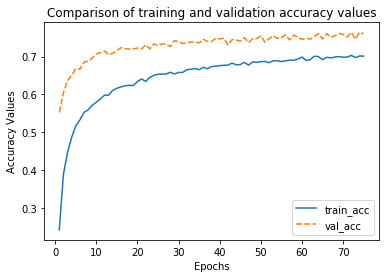

In [56]:
create_line_charts(create_acc_df(model_history_data1, 75), 'Comparison of training and validation accuracy values', 'Epochs', 'Accuracy Values')

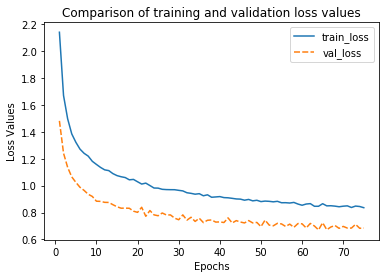

In [57]:
create_line_charts(create_loss_df(model_history_data1, 75), 'Comparison of training and validation loss values', 'Epochs', 'Loss Values')

In [58]:
test_generator1 = test_datagen1.flow_from_directory(test_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')
test_loss1, test_accuracy1 = custom_model1.evaluate_generator(test_generator1, steps=test_steps)
print('test_loss', test_loss1)
print('test_accuracy', test_accuracy1)


Found 2700 images belonging to 10 classes.
test_loss 0.7101916408254987
test_accuracy 0.7395833333333334


In [0]:
conv_base2 = get_VGG19_Conv_Base((64,64,3))

In [0]:
def print_layer_details(conv_base):
  
  for layer in conv_base.layers:
    print('layer name:', layer.name)
    print('layer trainable:', layer.trainable)

In [0]:
def handle_conv_base_block(conv_base, block_name_start):
  trainable = False
  for layer in conv_base.layers:
    if layer.name.startswith(block_name_start):
      trainable = True
    layer.trainable = trainable

In [62]:
print_layer_details(conv_base2)

layer name: input_2
layer trainable: False
layer name: block1_conv1
layer trainable: True
layer name: block1_conv2
layer trainable: True
layer name: block1_pool
layer trainable: True
layer name: block2_conv1
layer trainable: True
layer name: block2_conv2
layer trainable: True
layer name: block2_pool
layer trainable: True
layer name: block3_conv1
layer trainable: True
layer name: block3_conv2
layer trainable: True
layer name: block3_conv3
layer trainable: True
layer name: block3_conv4
layer trainable: True
layer name: block3_pool
layer trainable: True
layer name: block4_conv1
layer trainable: True
layer name: block4_conv2
layer trainable: True
layer name: block4_conv3
layer trainable: True
layer name: block4_conv4
layer trainable: True
layer name: block4_pool
layer trainable: True
layer name: block5_conv1
layer trainable: True
layer name: block5_conv2
layer trainable: True
layer name: block5_conv3
layer trainable: True
layer name: block5_conv4
layer trainable: True
layer name: block5_po

In [0]:
handle_conv_base_block(conv_base2, 'block5')

In [64]:
print_layer_details(conv_base2)

layer name: input_2
layer trainable: False
layer name: block1_conv1
layer trainable: False
layer name: block1_conv2
layer trainable: False
layer name: block1_pool
layer trainable: False
layer name: block2_conv1
layer trainable: False
layer name: block2_conv2
layer trainable: False
layer name: block2_pool
layer trainable: False
layer name: block3_conv1
layer trainable: False
layer name: block3_conv2
layer trainable: False
layer name: block3_conv3
layer trainable: False
layer name: block3_conv4
layer trainable: False
layer name: block3_pool
layer trainable: False
layer name: block4_conv1
layer trainable: False
layer name: block4_conv2
layer trainable: False
layer name: block4_conv3
layer trainable: False
layer name: block4_conv4
layer trainable: False
layer name: block4_pool
layer trainable: False
layer name: block5_conv1
layer trainable: True
layer name: block5_conv2
layer trainable: True
layer name: block5_conv3
layer trainable: True
layer name: block5_conv4
layer trainable: True
layer

In [0]:
custom_model2 = models.Sequential()
custom_model2.add(conv_base2)
custom_model2.add(layers.Flatten())
custom_model2.add(layers.Dropout(rate=0.3))
custom_model2.add(layers.Dense(512, activation='relu'))
custom_model2.add(layers.Dropout(rate=0.4))
custom_model2.add(layers.Dense(10, activation='softmax'))

In [66]:
custom_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 21,078,602
Trainable params: 10,493,450
Non-trainable params: 10,585,152
_________________________________

In [67]:
print('number of trainable weights', len(custom_model2.trainable_weights))

number of trainable weights 12


In [0]:
train_datagen2 = get_train_datagen(True)
validation_datagen2 = get_val_datagen()
test_datagen2 = get_test_datagen()

In [69]:
train_generator2 = train_datagen2.flow_from_directory(train_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')
validation_generator2 = validation_datagen2.flow_from_directory(val_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [0]:
custom_model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['accuracy'])

In [71]:
model_history_data2 = handle_model_fit_gen(custom_model2, 75, train_generator2, validation_generator2)

Epoch 1/75
337/337 [==============================] - 33s 98ms/step - loss: 1.1848 - acc: 0.5819 - val_loss: 0.7049 - val_acc: 0.7727
Epoch 2/75
337/337 [==============================] - 32s 95ms/step - loss: 0.6749 - acc: 0.7660 - val_loss: 0.5541 - val_acc: 0.8153
Epoch 3/75
337/337 [==============================] - 32s 95ms/step - loss: 0.5641 - acc: 0.8066 - val_loss: 0.4883 - val_acc: 0.8392
Epoch 4/75
337/337 [==============================] - 32s 96ms/step - loss: 0.5152 - acc: 0.8272 - val_loss: 0.4300 - val_acc: 0.8646
Epoch 5/75
337/337 [==============================] - 32s 95ms/step - loss: 0.4714 - acc: 0.8388 - val_loss: 0.5113 - val_acc: 0.8426
Epoch 6/75
337/337 [==============================] - 32s 95ms/step - loss: 0.4518 - acc: 0.8454 - val_loss: 0.4036 - val_acc: 0.8668
Epoch 7/75
337/337 [==============================] - 32s 96ms/step - loss: 0.4273 - acc: 0.8548 - val_loss: 0.4581 - val_acc: 0.8539
Epoch 8/75
337/337 [==============================] - 32s 95ms

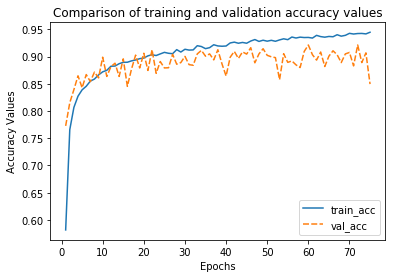

In [72]:
create_line_charts(create_acc_df(model_history_data2, 75), 'Comparison of training and validation accuracy values', 'Epochs', 'Accuracy Values')

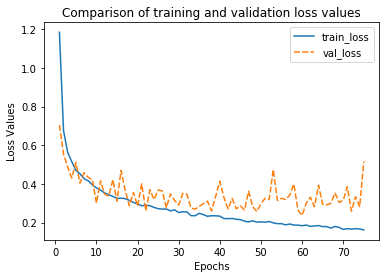

In [73]:
create_line_charts(create_loss_df(model_history_data2, 75), 'Comparison of training and validation loss values', 'Epochs', 'Loss Values')

In [74]:
test_generator2 = test_datagen2.flow_from_directory(test_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')
test_loss2, test_accuracy2 = custom_model2.evaluate_generator(test_generator2, steps=test_steps)
print('test_loss', test_loss2)
print('test_accuracy', test_accuracy2)


Found 2700 images belonging to 10 classes.
test_loss 0.5969128392281986
test_accuracy 0.8381696428571429


In [0]:
conv_base3 = get_VGG19_Conv_Base((64,64,3))

In [76]:
print_layer_details(conv_base3)

layer name: input_3
layer trainable: False
layer name: block1_conv1
layer trainable: True
layer name: block1_conv2
layer trainable: True
layer name: block1_pool
layer trainable: True
layer name: block2_conv1
layer trainable: True
layer name: block2_conv2
layer trainable: True
layer name: block2_pool
layer trainable: True
layer name: block3_conv1
layer trainable: True
layer name: block3_conv2
layer trainable: True
layer name: block3_conv3
layer trainable: True
layer name: block3_conv4
layer trainable: True
layer name: block3_pool
layer trainable: True
layer name: block4_conv1
layer trainable: True
layer name: block4_conv2
layer trainable: True
layer name: block4_conv3
layer trainable: True
layer name: block4_conv4
layer trainable: True
layer name: block4_pool
layer trainable: True
layer name: block5_conv1
layer trainable: True
layer name: block5_conv2
layer trainable: True
layer name: block5_conv3
layer trainable: True
layer name: block5_conv4
layer trainable: True
layer name: block5_po

In [0]:
handle_conv_base_block(conv_base3, 'block4')

In [78]:
print_layer_details(conv_base3)

layer name: input_3
layer trainable: False
layer name: block1_conv1
layer trainable: False
layer name: block1_conv2
layer trainable: False
layer name: block1_pool
layer trainable: False
layer name: block2_conv1
layer trainable: False
layer name: block2_conv2
layer trainable: False
layer name: block2_pool
layer trainable: False
layer name: block3_conv1
layer trainable: False
layer name: block3_conv2
layer trainable: False
layer name: block3_conv3
layer trainable: False
layer name: block3_conv4
layer trainable: False
layer name: block3_pool
layer trainable: False
layer name: block4_conv1
layer trainable: True
layer name: block4_conv2
layer trainable: True
layer name: block4_conv3
layer trainable: True
layer name: block4_conv4
layer trainable: True
layer name: block4_pool
layer trainable: True
layer name: block5_conv1
layer trainable: True
layer name: block5_conv2
layer trainable: True
layer name: block5_conv3
layer trainable: True
layer name: block5_conv4
layer trainable: True
layer name

In [0]:
custom_model3 = models.Sequential()
custom_model3.add(conv_base3)
custom_model3.add(layers.Flatten())
custom_model3.add(layers.Dropout(rate=0.3))
custom_model3.add(layers.Dense(512, activation='relu'))
custom_model3.add(layers.Dropout(rate=0.4))
custom_model3.add(layers.Dense(10, activation='softmax'))

In [80]:
custom_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 21,078,602
Trainable params: 18,753,034
Non-trainable params: 2,325,568
__________________________________

In [81]:
print('number of trainable weights', len(custom_model3.trainable_weights))

number of trainable weights 20


In [0]:
train_datagen3 = get_train_datagen(True)
validation_datagen3 = get_val_datagen()
test_datagen3 = get_test_datagen()

In [83]:
train_generator3 = train_datagen3.flow_from_directory(train_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')
validation_generator3 = validation_datagen3.flow_from_directory(val_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')

Found 21600 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.


In [0]:
custom_model3.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['accuracy'])

In [85]:
model_history_data3 = handle_model_fit_gen(custom_model3, 75, train_generator3, validation_generator3)

Epoch 1/75
337/337 [==============================] - 36s 106ms/step - loss: 1.0687 - acc: 0.6256 - val_loss: 0.5576 - val_acc: 0.8248
Epoch 2/75
337/337 [==============================] - 34s 101ms/step - loss: 0.5592 - acc: 0.8182 - val_loss: 0.5254 - val_acc: 0.8327
Epoch 3/75
337/337 [==============================] - 34s 102ms/step - loss: 0.4355 - acc: 0.8583 - val_loss: 0.4224 - val_acc: 0.8646
Epoch 4/75
337/337 [==============================] - 34s 101ms/step - loss: 0.3797 - acc: 0.8761 - val_loss: 0.4438 - val_acc: 0.8638
Epoch 5/75
337/337 [==============================] - 34s 102ms/step - loss: 0.3460 - acc: 0.8871 - val_loss: 0.3117 - val_acc: 0.8972
Epoch 6/75
337/337 [==============================] - 34s 102ms/step - loss: 0.3093 - acc: 0.8995 - val_loss: 0.3188 - val_acc: 0.8953
Epoch 7/75
337/337 [==============================] - 34s 102ms/step - loss: 0.2903 - acc: 0.9052 - val_loss: 0.2889 - val_acc: 0.9025
Epoch 8/75
337/337 [==============================] - 3

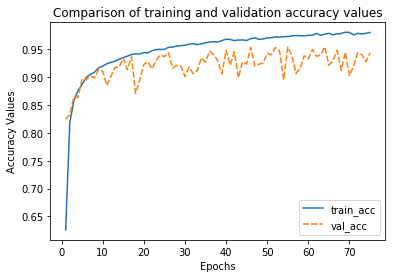

In [86]:
create_line_charts(create_acc_df(model_history_data3, 75), 'Comparison of training and validation accuracy values', 'Epochs', 'Accuracy Values')

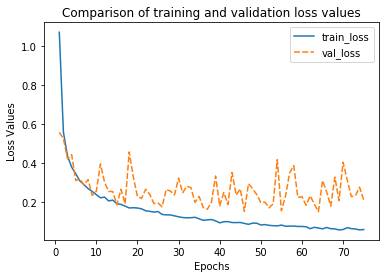

In [87]:
create_line_charts(create_loss_df(model_history_data3, 75), 'Comparison of training and validation loss values', 'Epochs', 'Loss Values')

In [88]:
test_generator3 = test_datagen3.flow_from_directory(test_dir, target_size=(64,64), batch_size=batch_size, class_mode='categorical')
test_loss3, test_accuracy3 = custom_model3.evaluate_generator(test_generator3, steps=test_steps)
print('test_loss', test_loss3)
print('test_accuracy', test_accuracy3)

Found 2700 images belonging to 10 classes.
test_loss 0.24853031674311274
test_accuracy 0.9341517857142857
